<a href="https://colab.research.google.com/github/sasdil/Machine-Learning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [12]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255

In [19]:
model = Sequential([
    Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(4,4),activation = "relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation = "relu"),
    Dense(10,activation = "softmax")

])
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [20]:
model.fit(x_train,y_train,epochs = 10,validation_data=(x_test,y_test),verbose = False)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0220 - accuracy: 0.6962


[1.0219544172286987, 0.6962000131607056]

In [35]:
probe = model.predict(x_test[:20])
prads = np.argmax(probe,axis =1)

1/1 [==============================] - 0s 123ms/step


3


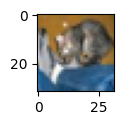

8


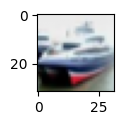

1


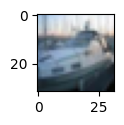

8


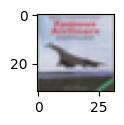

6


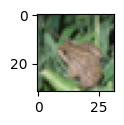

6


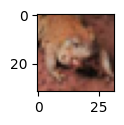

1


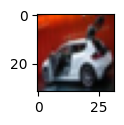

6


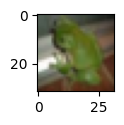

3


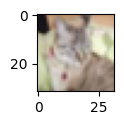

1


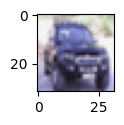

3


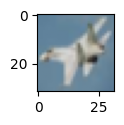

9


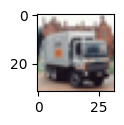

5


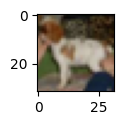

7


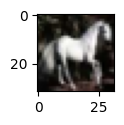

9


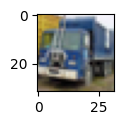

8


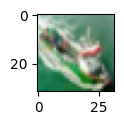

5


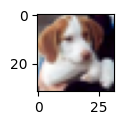

7


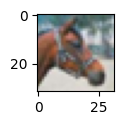

8


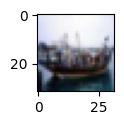

6


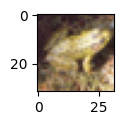

In [36]:
for i in range(20):
  print(prads[i])
  plt.figure(figsize=[4,1])
  plt.imshow(x_test[i])
  plt.show()